# **DATASET PREPROCESSING**

In [1]:
import matplotlib.pyplot as plt
import tensorflow

from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
X_test.shape
X_train.shape
y_train.shape
y_test.shape

(10000,)

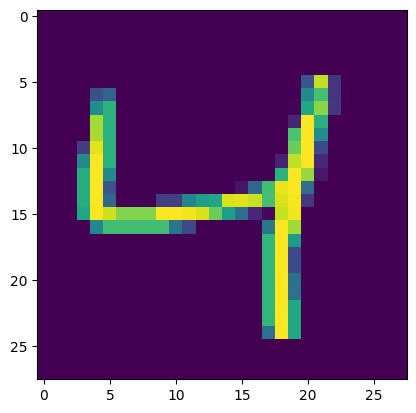

In [4]:
plt.imshow(X_train[2])

In [5]:
X_train = X_train/255
X_test = X_test/255

# **SCENARIO - 1**

In [6]:
model1 = Sequential()
model1.add(Flatten(input_shape=(28,28)))
model1.add(Dense(128,activation='sigmoid')) #2^n < 28*28
model1.add(Dense(32,activation='sigmoid'))
model1.add(Dense(10,activation='softmax')) #no of classes

In [7]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [8]:
optimizer = keras.optimizers.Adagrad(learning_rate=0.001)
model1.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [9]:
history1 = model1.fit(X_train,y_train,epochs=24,validation_split=0.3)

Epoch 1/24
1313/1313 [==============================] - 12s 9ms/step - loss: 2.3165 - accuracy: 0.1517 - val_loss: 2.2752 - val_accuracy: 0.2410
Epoch 2/24
1313/1313 [==============================] - 10s 8ms/step - loss: 2.2571 - accuracy: 0.2807 - val_loss: 2.2410 - val_accuracy: 0.3595
Epoch 3/24
1313/1313 [==============================] - 7s 5ms/step - loss: 2.2233 - accuracy: 0.3804 - val_loss: 2.2064 - val_accuracy: 0.4320
Epoch 4/24
1313/1313 [==============================] - 6s 4ms/step - loss: 2.1873 - accuracy: 0.4646 - val_loss: 2.1685 - val_accuracy: 0.4958
Epoch 5/24
1313/1313 [==============================] - 5s 4ms/step - loss: 2.1479 - accuracy: 0.5180 - val_loss: 2.1270 - val_accuracy: 0.5484
Epoch 6/24
1313/1313 [==============================] - 6s 5ms/step - loss: 2.1051 - accuracy: 0.5567 - val_loss: 2.0822 - val_accuracy: 0.5814
Epoch 7/24
1313/1313 [==============================] - 5s 4ms/step - loss: 2.0592 - accuracy: 0.5830 - val_loss: 2.0344 - val_accurac

In [33]:
y_prob = model1.predict(X_test)
y_pred = y_prob.argmax(axis=1)

313/313 [==============================] - 1s 2ms/step


In [34]:
from sklearn.metrics import accuracy_score
a1 = accuracy_score(y_test,y_pred)
a1

0.7496

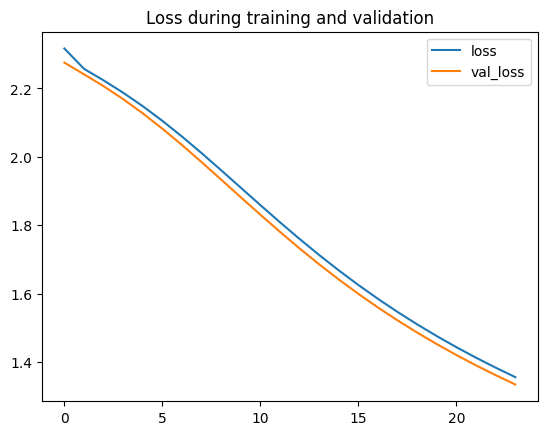

In [12]:
plt.title("Loss during training and validation")
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.legend(['loss','val_loss'])

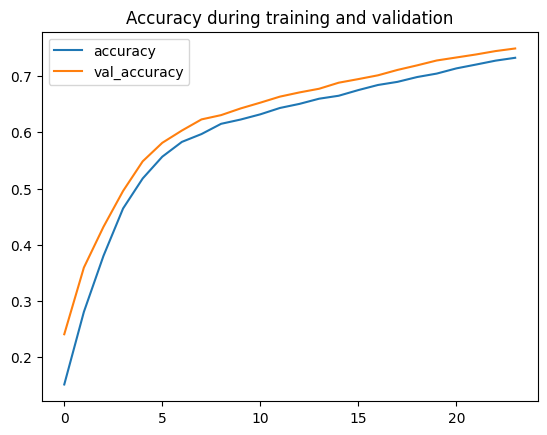

In [13]:
plt.title("Accuracy during training and validation")
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])

1/1 [==============================] - 0s 35ms/step


array([2])

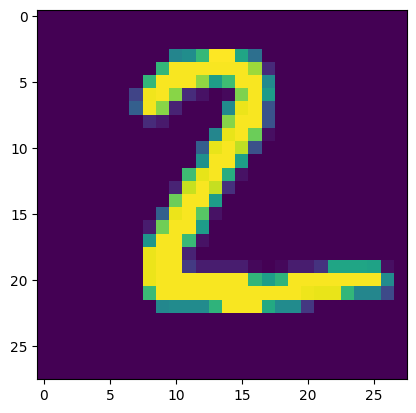

In [14]:
plt.imshow(X_test[1])
model1.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

# **SCENARIO - 2**

In [15]:
model2 = Sequential()  ###
model2.add(Flatten(input_shape=(28,28)))
model2.add(Dense(128,activation='relu')) #change - 1
model2.add(Dense(32,activation='relu'))
model2.add(Dense(10,activation='softmax'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 32)                4128      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [16]:
optimizer = keras.optimizers.Adam(learning_rate=0.001) #change - 2
model2.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])  ###
history2 = model2.fit(X_train,y_train,epochs=25,validation_split=0.2) #change -2   ###

Epoch 1/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2894 - accuracy: 0.9155 - val_loss: 0.1555 - val_accuracy: 0.9545
Epoch 2/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1224 - accuracy: 0.9636 - val_loss: 0.1379 - val_accuracy: 0.9598
Epoch 3/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0855 - accuracy: 0.9736 - val_loss: 0.1087 - val_accuracy: 0.9667
Epoch 4/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0631 - accuracy: 0.9805 - val_loss: 0.0984 - val_accuracy: 0.9711
Epoch 5/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0493 - accuracy: 0.9845 - val_loss: 0.0901 - val_accuracy: 0.9732
Epoch 6/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0374 - accuracy: 0.9883 - val_loss: 0.0982 - val_accuracy: 0.9737
Epoch 7/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0334 - accuracy: 0.9892 - val_loss: 0.1027 - val_accuracy:

In [35]:
from sklearn.metrics import accuracy_score
y_prob = model2.predict(X_test)  ###
y_pred = y_prob.argmax(axis=1)
a2 = accuracy_score(y_test,y_pred)
a2

313/313 [==============================] - 1s 2ms/step


0.9759

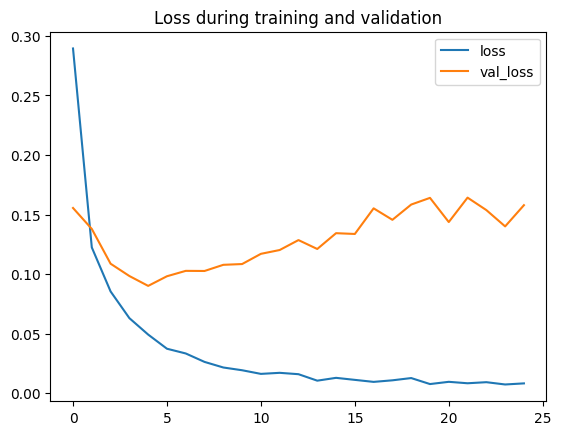

In [18]:
plt.title("Loss during training and validation")
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.legend(['loss','val_loss'])

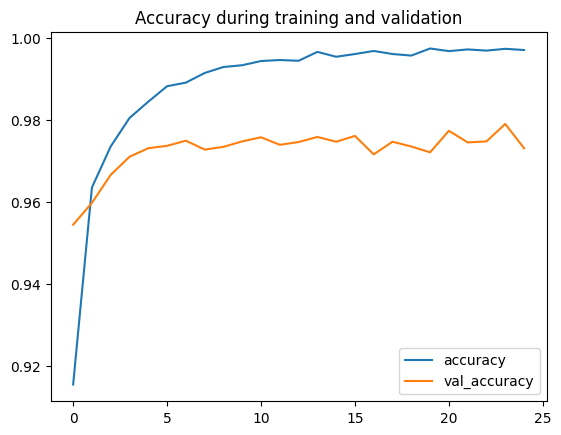

In [19]:
plt.title("Accuracy during training and validation")
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])

1/1 [==============================] - 0s 23ms/step


array([2])

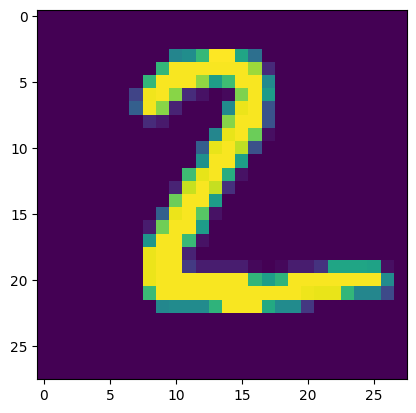

In [20]:
plt.imshow(X_test[1])
model2.predict(X_test[1].reshape(1,28,28)).argmax(axis=1) ###

# **SCENARIO - 3**

In [21]:
model3 = Sequential()  ###
model3.add(Flatten(input_shape=(28,28)))
model3.add(Dense(128,activation='tanh')) #change - 1
model3.add(Dense(32,activation='tanh'))
model3.add(Dense(10,activation='softmax'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 32)                4128      
                                                                 
 dense_8 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [22]:
optimizer = keras.optimizers.Adadelta(learning_rate=0.001) #change - 2
model3.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])  ###
history3 = model3.fit(X_train,y_train,epochs=21,validation_split=0.1) #change -2   ###

Epoch 1/21
1688/1688 [==============================] - 10s 5ms/step - loss: 2.2288 - accuracy: 0.2155 - val_loss: 2.0746 - val_accuracy: 0.3175
Epoch 2/21
1688/1688 [==============================] - 9s 5ms/step - loss: 1.9972 - accuracy: 0.3610 - val_loss: 1.8544 - val_accuracy: 0.4622
Epoch 3/21
1688/1688 [==============================] - 8s 5ms/step - loss: 1.8003 - accuracy: 0.5058 - val_loss: 1.6691 - val_accuracy: 0.6070
Epoch 4/21
1688/1688 [==============================] - 9s 5ms/step - loss: 1.6358 - accuracy: 0.6131 - val_loss: 1.5154 - val_accuracy: 0.6848
Epoch 5/21
1688/1688 [==============================] - 9s 5ms/step - loss: 1.5001 - accuracy: 0.6715 - val_loss: 1.3887 - val_accuracy: 0.7228
Epoch 6/21
1688/1688 [==============================] - 8s 5ms/step - loss: 1.3878 - accuracy: 0.7016 - val_loss: 1.2829 - val_accuracy: 0.7510
Epoch 7/21
1688/1688 [==============================] - 9s 5ms/step - loss: 1.2939 - accuracy: 0.7229 - val_loss: 1.1940 - val_accuracy

In [36]:
from sklearn.metrics import accuracy_score
y_prob = model3.predict(X_test)  ###
y_pred = y_prob.argmax(axis=1)
a3 = accuracy_score(y_test,y_pred)
a3

313/313 [==============================] - 2s 6ms/step


0.8534

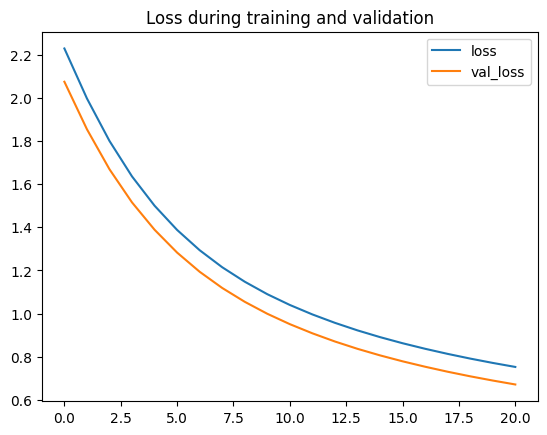

In [24]:
plt.title("Loss during training and validation")
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.legend(['loss','val_loss'])

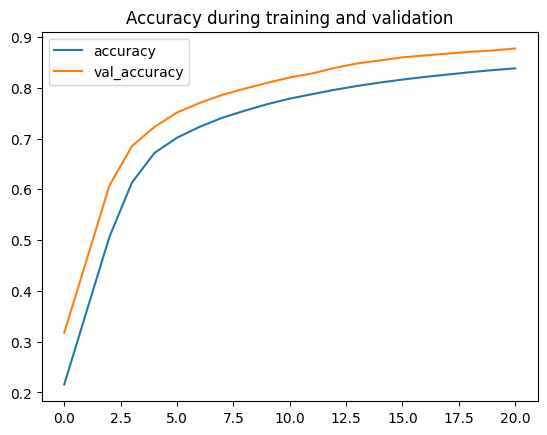

In [25]:
plt.title("Accuracy during training and validation")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])

1/1 [==============================] - 0s 96ms/step


array([2])

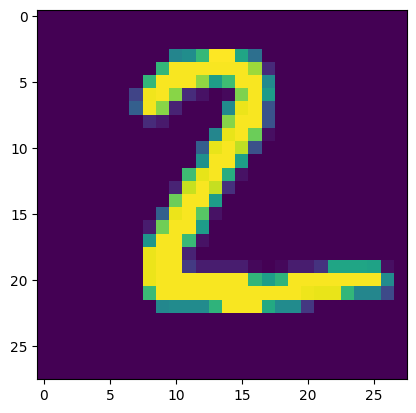

In [26]:
plt.imshow(X_test[1])
model3.predict(X_test[1].reshape(1,28,28)).argmax(axis=1) ###

# **SCENARIO - 4**

In [27]:
model4 = Sequential()  ###
model4.add(Flatten(input_shape=(28,28)))
model4.add(Dense(128,activation='sigmoid')) #change - 1
model4.add(Dense(32,activation='sigmoid'))
model4.add(Dense(10,activation='softmax'))
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               100480    
                                                                 
 dense_10 (Dense)            (None, 32)                4128      
                                                                 
 dense_11 (Dense)            (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [28]:
optimizer = keras.optimizers.Adam(learning_rate=0.001) #change - 2
model4.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])  ###
history4 = model4.fit(X_train,y_train,epochs=23,validation_split=0.2) #change -2   ###

Epoch 1/23
1500/1500 [==============================] - 11s 6ms/step - loss: 0.6381 - accuracy: 0.8484 - val_loss: 0.2610 - val_accuracy: 0.9282
Epoch 2/23
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2207 - accuracy: 0.9376 - val_loss: 0.1776 - val_accuracy: 0.9489
Epoch 3/23
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1532 - accuracy: 0.9550 - val_loss: 0.1406 - val_accuracy: 0.9600
Epoch 4/23
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1134 - accuracy: 0.9682 - val_loss: 0.1231 - val_accuracy: 0.9640
Epoch 5/23
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0885 - accuracy: 0.9749 - val_loss: 0.1095 - val_accuracy: 0.9660
Epoch 6/23
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0709 - accuracy: 0.9797 - val_loss: 0.0964 - val_accuracy: 0.9718
Epoch 7/23
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0571 - accuracy: 0.9841 - val_loss: 0.0986 - val_accuracy

In [37]:
from sklearn.metrics import accuracy_score
y_prob = model4.predict(X_test)  ###
y_pred = y_prob.argmax(axis=1)
a4 = accuracy_score(y_test,y_pred)

313/313 [==============================] - 1s 2ms/step


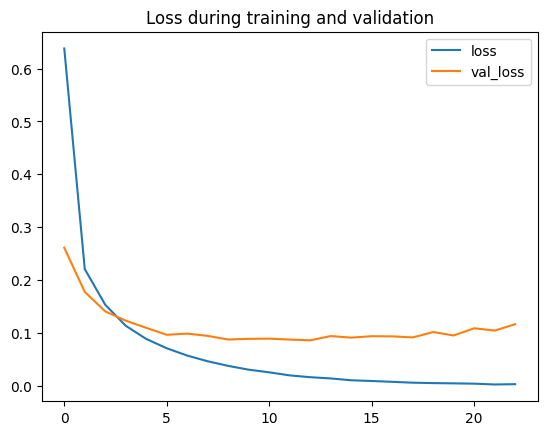

In [30]:
plt.title("Loss during training and validation")
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.legend(['loss','val_loss'])

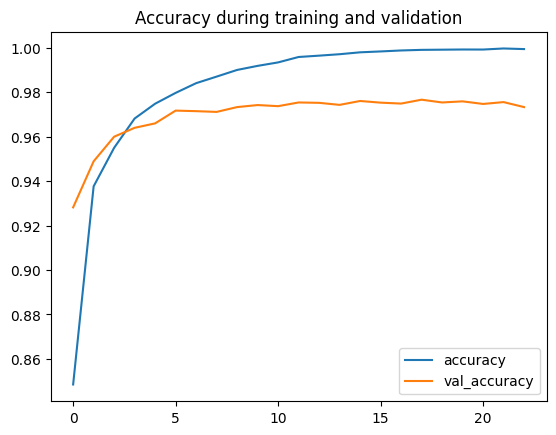

In [31]:
plt.title("Accuracy during training and validation")
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])

1/1 [==============================] - 0s 23ms/step


array([2])

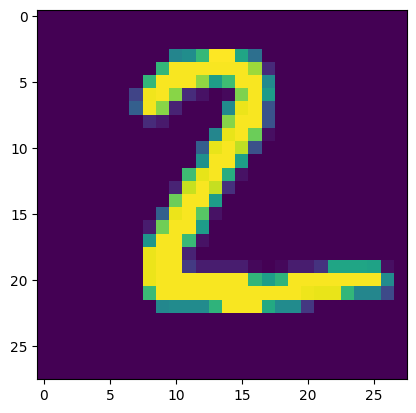

In [32]:
plt.imshow(X_test[1])
model4.predict(X_test[1].reshape(1,28,28)).argmax(axis=1) ###

# **VISUALIZATION**

In [39]:
import numpy as np

In [40]:
a = [a1,a2,a3,a4]
s = ['scenario 1','scenario 2','scenario 3','scenario 4']

In [43]:
a

[0.7496, 0.9759, 0.8534, 0.9772]

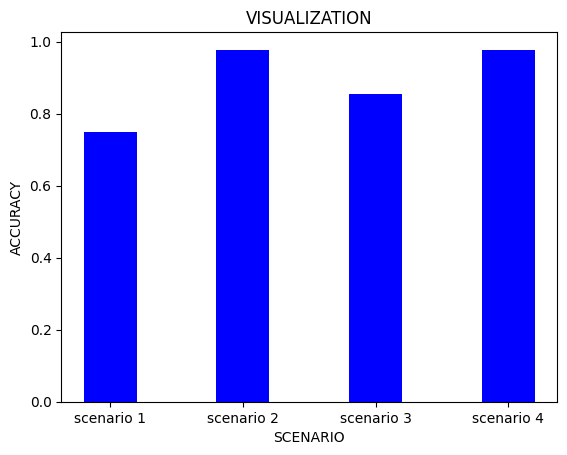

In [41]:
plt.bar(s,a,color='blue',width = 0.4)
plt.xlabel("SCENARIO")
plt.ylabel("ACCURACY")
plt.title("VISUALIZATION")
plt.show()

# New Section

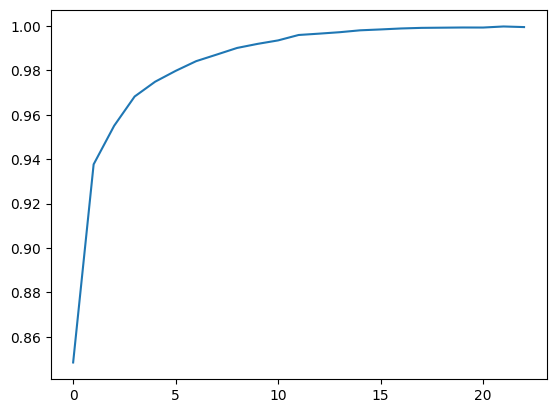

In [46]:
plt.plot(history.history['accuracy'])

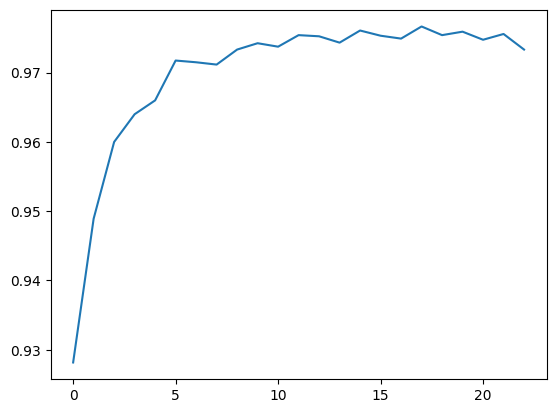

In [47]:
plt.plot(history.history['val_accuracy'])